##**Countries in the world by population (2022)**

#**Introduction**

**A population is a distinct group of individuals, whether that group comprises a nation or a group of people with a common characteristic. In statistics, a population is the pool of individuals from which a statistical sample is drawn for a study. In demographics, the world population is the total number of humans currently living, and was estimated to have reached 7,800,000,000 people as of March 2020. It took over 2 million years of human prehistory and history for the world's population to reach 1 billion, and only 200 years more to reach 7 billion.**

#**Context**
**This dataset comes from the we site "https://www.worldometers.info/world-population/population-by-country/' using web scrapping we etracted. that data has been used for our analysis. world population data frame gives the information about population each countries, area , maigrants, etc**

#**Attribute Information:**

**Year — Year detail in which population data is recorded**

**Country — Name of Country**

**Population — Population of Country in a given year**

**Yearly % Change — Change in population since last year (in %)**

**Yearly Change — Change in population since last year**

**Migrants — Number of migrants**

**Median Age — Median age of the population**

**Fertility Rate — Fertility rate (in %)**

**Density (P/Km²) — Density of country**

**Urban Pop % — % of the population is living in an Urban area**

**Urban Population — Net population living in Urban area**

**Country’s Share of World Pop % — Country’s share in Total World Population**

**World Population — World Population**

**Country Global Rank — Global rank of country**

In [116]:
import pandas as pd; # importing required librery 
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import requests;


In [3]:
headers = {"User-Agent":"mozilla/5.0"}
URL = "https://www.worldometers.info/world-population/population-by-country/" # scrapping data from given website
page = requests.get(URL,headers = headers).text

In [4]:
df = pd.read_html(page)[0] # storing data to df


In [5]:
df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,Honduras,9904607,1.63 %,158490,89,111890,-6800.0,2.5,24,57 %,0.13 %
1,2,United Arab Emirates,9890402,1.23 %,119873,118,83600,40000.0,1.4,33,86 %,0.13 %
2,3,Djibouti,988000,1.48 %,14440,43,23180,900.0,2.8,27,79 %,0.01 %
3,4,Saint Barthelemy,9877,0.30 %,30,470,21,NaN,N.A.,N.A.,0 %,0.00 %
4,5,Seychelles,98347,0.62 %,608,214,460,-200.0,2.5,34,56 %,0.00 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Jordan,10203134,1.00 %,101440,115,88780,10220.0,2.8,24,91 %,0.13 %
231,232,Portugal,10196709,-0.29 %,-29478,111,91590,-6000.0,1.3,46,66 %,0.13 %
232,233,Azerbaijan,10139177,0.91 %,91459,123,82658,1200.0,2.1,32,56 %,0.13 %
233,234,Sweden,10099265,0.63 %,62886,25,410340,40000.0,1.9,41,88 %,0.13 %


In [ ]:
df.shape

(235, 12)

In [ ]:
df.columns

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [ ]:
df.head()

In [ ]:
df.tail()


In [6]:
df=df.replace('N.A.',np.nan) # there are values like N.A. which we are corverting to NA

In [7]:
def conv(num):
  return float(num.strip('%')) # function remove % charecter from table

In [8]:
df['Yearly Change']=df['Yearly Change'].apply(conv)


In [10]:
df['World Share'] = df['World Share'].apply(conv)

In [ ]:
df['Urban_pop_in_Percentage'] = df['Urban_pop_in_Percentage'].replace("%","",regex = True).astype("float")


In [ ]:
df = df.astype({'fertility_Rate': float}) # changing data type to float

In [ ]:
df = df.astype({'Median_age': float}) # changing data type to float

In [17]:
df

,SL_No,Country,Population,Percentage of Yearly change,Net Change,Density,Area,Migrants,fertility_Rate,Median_age,Urban_pop_in_Percentage,World Share
0,1,Honduras,9904607,1.63,158490,89,111890,-6800.0,2.5,24,57.0,0.13
1,2,United Arab Emirates,9890402,1.23,119873,118,83600,40000.0,1.4,33,86.0,0.13
2,3,Djibouti,988000,1.48,14440,43,23180,900.0,2.8,27,79.0,0.01
3,4,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.00
4,5,Seychelles,98347,0.62,608,214,460,-200.0,2.5,34,56.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Jordan,10203134,1.00,101440,115,88780,10220.0,2.8,24,91.0,0.13
231,232,Portugal,10196709,-0.29,-29478,111,91590,-6000.0,1.3,46,66.0,0.13
232,233,Azerbaijan,10139177,0.91,91459,123,82658,1200.0,2.1,32,56.0,0.13
233,234,Sweden,10099265,0.63,62886,25,410340,40000.0,1.9,41,88.0,0.13


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SL_No                        235 non-null    int64  
 1   Country                      235 non-null    object 
 2   Population                   235 non-null    int64  
 3   Percentage of Yearly change  235 non-null    float64
 4   Net Change                   235 non-null    int64  
 5   Density                      235 non-null    int64  
 6   Area                         235 non-null    int64  
 7   Migrants                     201 non-null    float64
 8   fertility_Rate               201 non-null    object 
 9   Median_age                   201 non-null    object 
 10  Urban_pop_in_Percentage      221 non-null    float64
 11  World Share                  235 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 22.2+ KB


In [ ]:
df.describe()


,#,Population (2020),Net Change,Density (P/Km²),Land Area (Km²),Migrants (net)
count,235.000000,2.350000e+02,2.350000e+02,235.000000,2.350000e+02,201.000000
mean,118.000000,2.729884e+07,-5.526253e+06,476.434043,5.535918e+05,-5.442786
std,67.982841,1.023724e+08,8.915707e+07,2331.491161,1.687796e+06,123292.057588
min,1.000000,0.000000e+00,-1.366418e+09,0.000000,0.000000e+00,-653249.000000
25%,59.500000,3.988760e+05,3.875000e+02,35.500000,2.545000e+03,-10047.000000
50%,118.000000,5.421241e+06,3.774200e+04,94.000000,7.724000e+04,-960.000000
75%,176.500000,1.974426e+07,2.288515e+05,239.500000,4.038200e+05,9741.000000
max,235.000000,1.439324e+09,5.540090e+06,26337.000000,1.637687e+07,954806.000000


##Please report number of rows and columns

In [ ]:
df.shape # using shpe function to find no of rows and columns

(235, 12)

**there are 235 row and 12 columns are present in given data frame**

##Please report if there is any missing value in the dataset. (Do not remove or fill it)

In [ ]:
df.isna().sum() # Counting number of missing values


#                           0
Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                14
World Share                 0
dtype: int64

there are 34 missing values in column Migrant

34 missing values in fert. rate

34 missing values in column med.Age

34 missing values in column world share

##Please rename the columns appropriately

In [12]:
df.columns # Old column name

Index(['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [13]:
df = df.rename(columns={'#': 'SL_No', 'Country (or dependency)': 'Country','Population (2020)':'Population','Yearly Change':'Percentage of Yearly change','Density (P/Km²)':'Density','Land Area (Km²)':'Area','Migrants (net)':'Migrants','Fert. Rate':'fertility_Rate','Med. Age':'Median_age','Urban Pop %':'Urban_pop_in_Percentage'})

In [14]:
df.columns # Changed column name

Index(['SL_No', 'Country', 'Population', 'Percentage of Yearly change',
       'Net Change', 'Density', 'Area', 'Migrants', 'fertility_Rate',
       'Median_age', 'Urban_pop_in_Percentage', 'World Share'],
      dtype='object')

##Please report the top ten and bottom ten countries based on the density column.

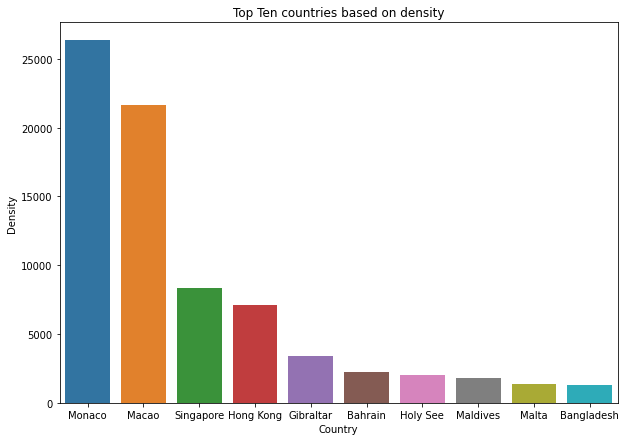

In [46]:
fig = plt.figure(figsize=(10,7))
plt.title("Top Ten countries based on density")

sns.barplot(
    x='Country',
    y='Density',
    data=df.nlargest(10, 'Density')
)
plt.show()

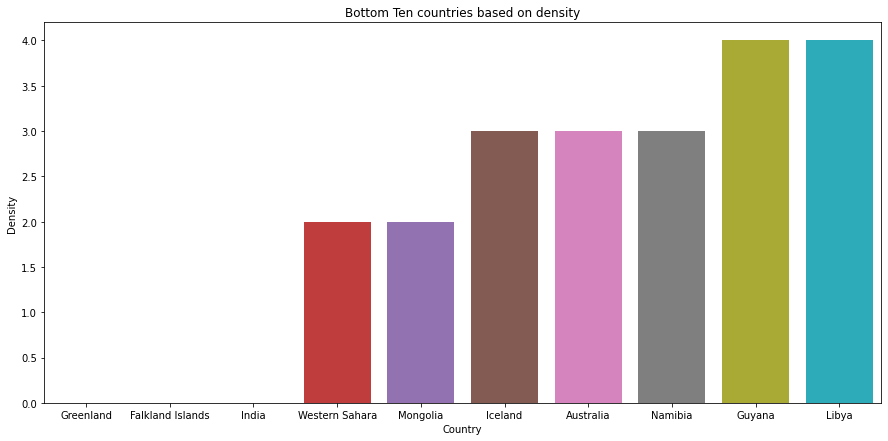

In [45]:
fig = plt.figure(figsize=(15,7))
plt.title("Bottom Ten countries based on density")

sns.barplot(
    x='Country',
    y='Density',
    data=df.nsmallest(10, 'Density')
)
plt.show()

**From the above graph, top 10 contries based on density are:- monaco, macao, singapore, hong kong, gibraltar, behrain, holy see, maldives, malta, bangladesh**

**Bottom 10 countries are Greenland, Falkland islands, india, western sahara, mangolia, ice land, australia, nambia, guyana, libya**

##Which country has the highest fertility rate and which country has the lowest fertility rate? Please report the top 10 countries and bottom 10 countries.

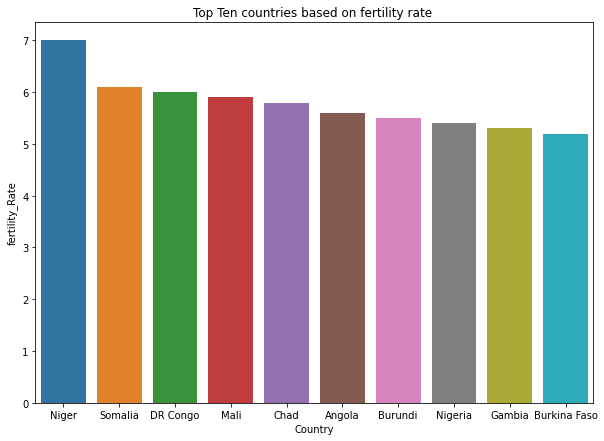

In [50]:
fig = plt.figure(figsize=(10,7))
plt.title("Top Ten countries based on fertility rate ")

sns.barplot(
    x='Country',
    y='fertility_Rate',
    data=df.nlargest(10, 'fertility_Rate')
)
plt.show()

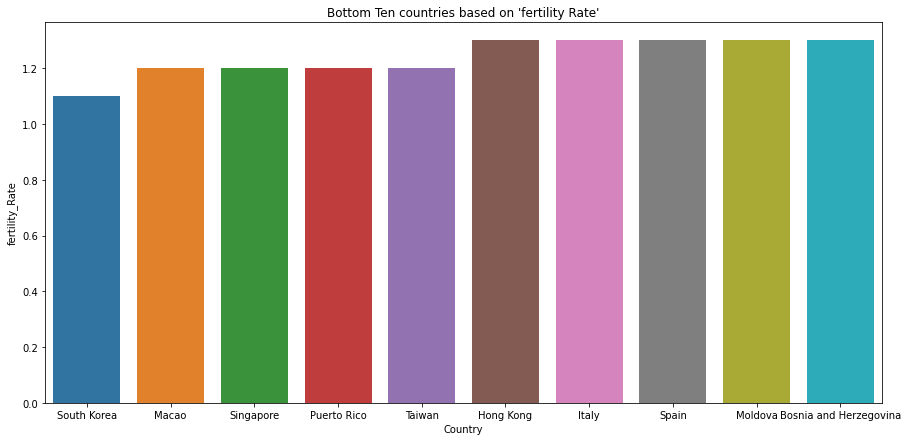

In [51]:
fig = plt.figure(figsize=(15,7))
plt.title("Bottom Ten countries based on 'fertility Rate'")

sns.barplot(
    x='Country',
    y='fertility_Rate',
    data=df.nsmallest(10, 'fertility_Rate')
)
plt.show()

From above plot, highest fertility rate country is **Niger**

Lowest rate country is **south korea**

##Report top 5 largest countries in this word based on land area

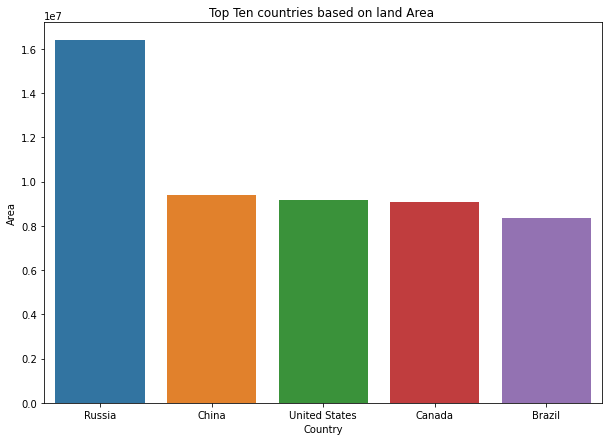

In [55]:
fig = plt.figure(figsize=(10,7))
plt.title("Top Ten countries based on land Area ")

sns.barplot(
    x='Country',
    y='Area',
    data=df.nlargest(5, 'Area')
)
plt.show()

**Top 5 countries based on Land area are :- Russia, China, United states, Canada, Brazil**

##Report top 5 countries in this word based on median value

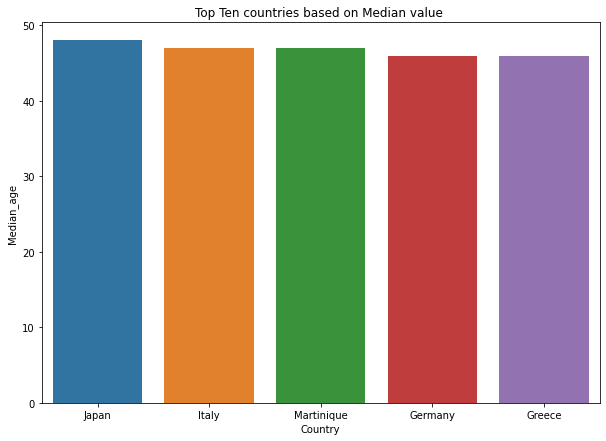

In [71]:
fig = plt.figure(figsize=(10,7))
plt.title("Top Ten countries based on Median value ")

ax=sns.barplot( x='Country', y='Median_age',data=df.nlargest(5, 'Median_age'), ci = None)
plt.show()

**Top Five countries based on median values are Japan, Italy, martinique, Germany, Greece**

##Create appropriate graphs to examine the distribution of Population, median age and Urban population and Yearly change

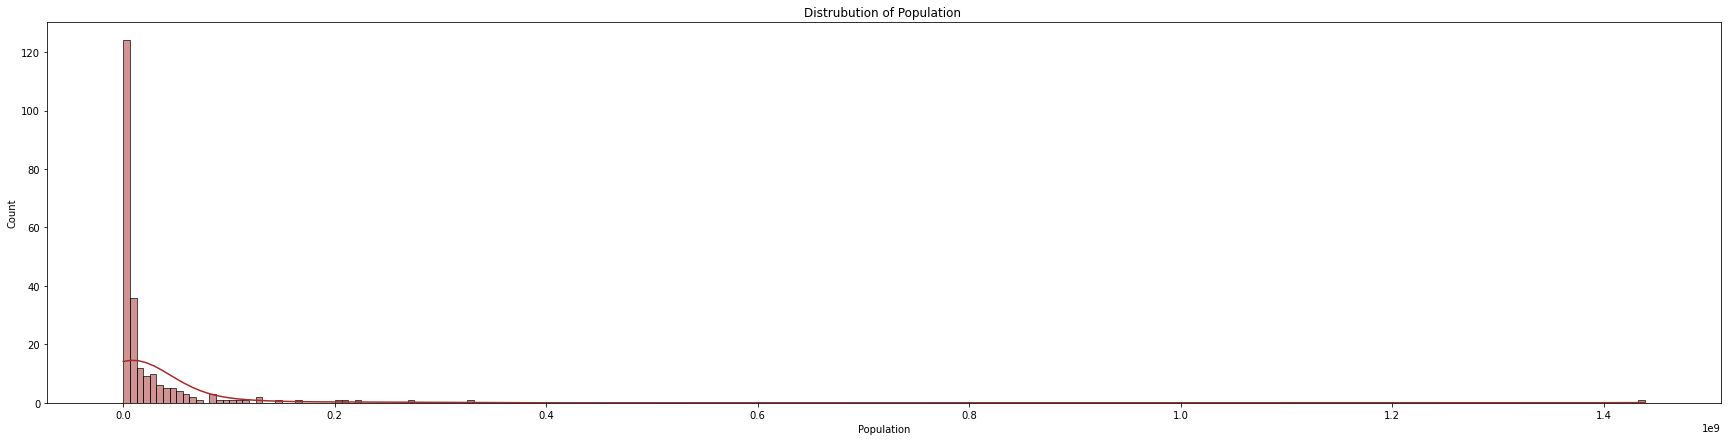

In [82]:
fig = plt.figure(figsize=(30,7))
plt.title("Distrubution of Population ")
sns.histplot(data=df, x='Population', kde=True, color="brown")
plt.show()

**population data is Right skewed**

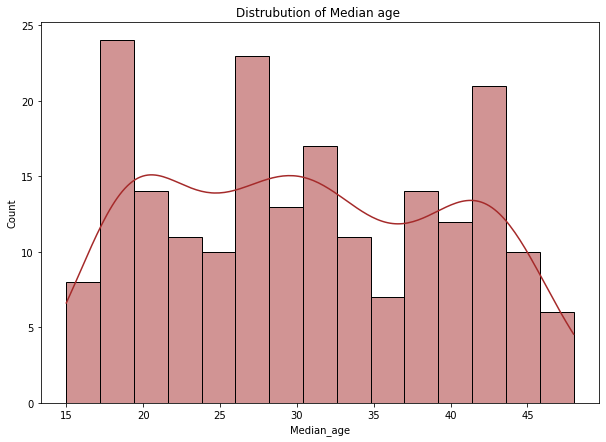

In [97]:
fig = plt.figure(figsize=(10,7))
plt.title("Distrubution of Median age ")
sns.histplot(data=df, x='Median_age', kde=True, color="brown",bins =15)
plt.show()

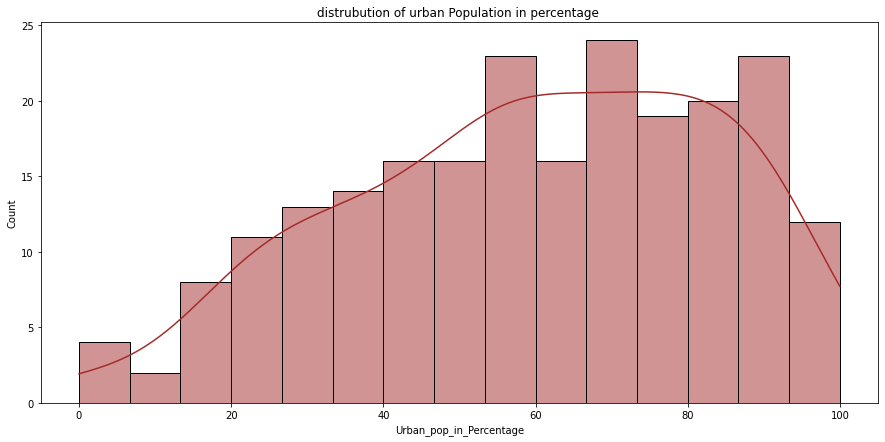

In [99]:
fig = plt.figure(figsize=(15,7))
plt.title("distrubution of urban Population in percentage ")
sns.histplot(data=df, x='Urban_pop_in_Percentage', kde=True, color="brown",bins =15)
plt.show()

**Ditrubution of urban population is left skewed data**

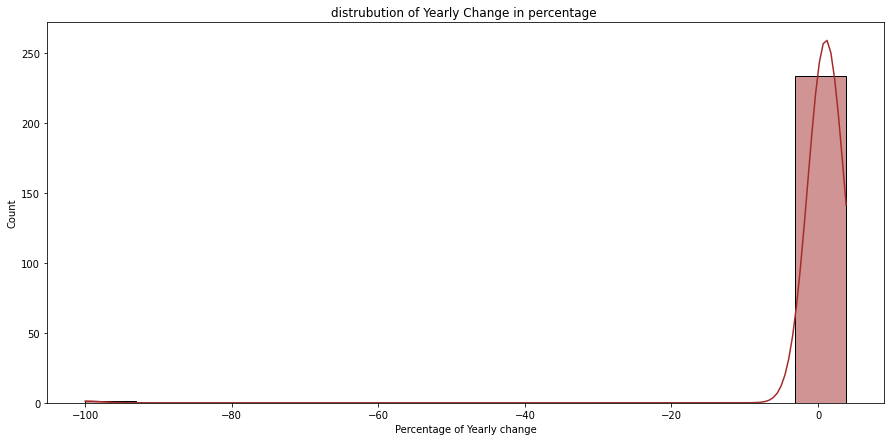

In [100]:
fig = plt.figure(figsize=(15,7))
plt.title("distrubution of Yearly Change in percentage ")
sns.histplot(data=df, x='Percentage of Yearly change', kde=True, color="brown",bins =15)
plt.show()

**Ditrubution of yearly change is left skewed data**

##Please sort the population column based on lowest populated countries and report bottom 10 countries as well as top 10 countries.

In [ ]:
df_sort = df.sort_values('Population', ascending= True)


In [ ]:
df_sort

In [105]:
df_sort.head(10)

,SL_No,Country,Population,Percentage of Yearly change,Net Change,Density,Area,Migrants,fertility_Rate,Median_age,Urban_pop_in_Percentage,World Share
234,235,India,0,-100.00,-1366417754,0,2973190,-532687.0,2.2,28.0,NaN,0.0
24,25,Holy See,801,0.25,2,2003,0,NaN,NaN,NaN,NaN,0.0
197,198,Tokelau,1357,1.27,17,136,10,NaN,NaN,NaN,0.0,0.0
189,190,Niue,1626,0.68,11,6,260,NaN,NaN,NaN,46.0,0.0
113,114,Falkland Islands,3480,3.05,103,0,12170,NaN,NaN,NaN,66.0,0.0
78,79,Montserrat,4992,0.06,3,50,100,NaN,NaN,NaN,10.0,0.0
57,58,Saint Pierre & Miquelon,5794,-0.48,-28,25,230,NaN,NaN,NaN,100.0,0.0
48,49,Saint Helena,6077,0.30,18,16,390,NaN,NaN,NaN,27.0,0.0
3,4,Saint Barthelemy,9877,0.30,30,470,21,NaN,NaN,NaN,0.0,0.0
223,224,Nauru,10824,0.63,68,541,20,NaN,NaN,NaN,NaN,0.0


In [106]:
df_sort.tail(10)

,SL_No,Country,Population,Percentage of Yearly change,Net Change,Density,Area,Migrants,fertility_Rate,Median_age,Urban_pop_in_Percentage,World Share
204,205,Japan,126476461,-0.30,-383840,347,364555,71560.0,1.4,48.0,92.0,1.62
202,203,Mexico,128932753,1.06,1357224,66,1943950,-60000.0,2.1,29.0,84.0,1.65
193,194,Russia,145934462,0.04,62206,9,16376870,182456.0,1.8,40.0,74.0,1.87
186,187,Bangladesh,164689383,1.01,1643222,1265,130170,-369501.0,2.1,28.0,39.0,2.11
164,165,Nigeria,206139589,2.58,5175990,226,910770,-60000.0,5.4,18.0,52.0,2.64
160,161,Brazil,212559417,0.72,1509890,25,8358140,21200.0,1.7,33.0,88.0,2.73
156,157,Pakistan,220892340,2.00,4327022,287,770880,-233379.0,3.6,23.0,35.0,2.83
142,143,Indonesia,273523615,1.07,2898047,151,1811570,-98955.0,2.3,30.0,56.0,3.51
119,120,United States,331002651,0.59,1937734,36,9147420,954806.0,1.8,38.0,83.0,4.25
194,195,China,1439323776,0.39,5540090,153,9388211,-348399.0,1.7,38.0,61.0,18.47


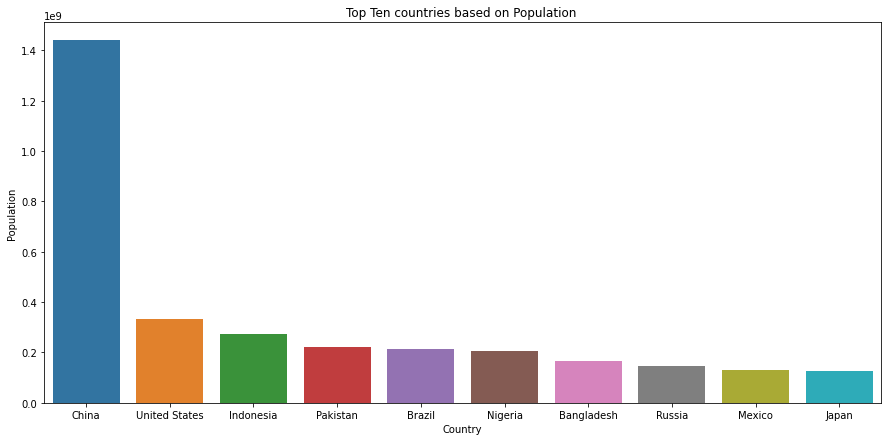

In [108]:
fig = plt.figure(figsize=(15,7))
plt.title("Top Ten countries based on Population ")

sns.barplot(
    x='Country',
    y='Population',
    data=df.nlargest(10, 'Population')
)
plt.show()

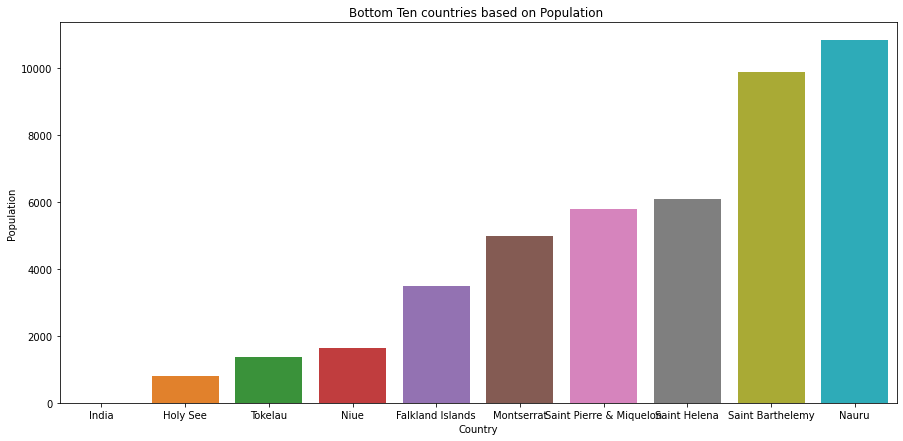

In [110]:
fig = plt.figure(figsize=(15,7))
plt.title("Bottom Ten countries based on Population ")

sns.barplot(
    x='Country',
    y='Population',
    data=df.nsmallest(10, 'Population')
)
plt.show()

##                                                                          **PART-2**

In [119]:
class standard:
    def __init__(self,a,b,c):
     self.Std_name = a
     self.enrolled_students = b
     self.Overall_GPA = c

    def getStd(self):
      print("Name of standard is ",self.Std_name)

    def getEnrolled(self):
      print("Number of enrolled students are ",self.enrolled_students)

    def  getOGPA(self):
      print("Over all GPA is  ",self.Overall_GPA )



In [ ]:
class student:
    def __init__(self,a,b,c,d,e,f,g):
     self.Name = a
     self.Roll_No = b
     self.Standard = c
     self.Math_marks = d
     self.English_Marks = e
     self.Science_Marks = f
     self.Social_Marks = g


    def getName(self):
      print("Name of standard is ",self.Name)

    def getRollNo(self):
      print("Number of enrolled students are ",self.Roll_No)

    def  getStd(self):
      print("Over all GPA is  ",self.Standard )
       

In [120]:
a = standard("10.00","12.00","58")
a.getStd()
a.getEnrolled()
a.getOGPA()

Name of standard is  10.00
Number of enrolled students are  12.00
Over all GPA is   58
